## Introduction to Reinforcement Learning - the Mountain Car Challenge

### One random Episode - with human rendering

__Prompt:__ I have installed Anaconda and all required libraries to work with OpenAI´s gymnasium Reinforcement Learning environments. Also I have installed Microsoft Visual Studio to visualize environments such as Mountain Car. Please provide a Python code example that creates and runs a random episode in the 'MountainCar-v0' environment using the gymnasium library, with human rendering enabled and printing the total reward and number of steps at the end. Please note that gym is now gymnasium.

In [ ]:
import gymnasium as gym

# Create the environment
env = gym.make('MountainCar-v0', render_mode = 'human')

# Reset the environment to get the initial state
state, info = env.reset()

total_reward = 0
steps = 0

done = False
while not done:
    # Sample a random action
    action = env.action_space.sample()

    # Take the action and observe the result
    next_state, reward, done, truncated, info = env.step(action)

    # Update the total reward and number of steps
    total_reward += reward
    steps += 1

    # Render the evnironment
    env.render()

    # Update the next state
    state = next_state

# Close the environemnt
env.close()

# Print the total reward and number of steps
print(f'Total reward: {total_reward}')
print(f'Number of steps: {steps}')

KeyboardInterrupt: 

In [ ]:
import gymnasium as gym

# Create the environment
env = gym.make('MountainCar-v0', render_mode = 'human', max_episode_steps=200)

# Reset the environment to get the initial state
state, info = env.reset()

total_reward = 0

done = False
truncated = False
while not done and not truncated:
    # Sample a random action
    action = env.action_space.sample()

    # Take the action and observe the result
    # reward is -1 unless the car has reached the goal, in which case it is 0
    next_state, reward, done, truncated, info = env.step(action)

    # Update the total reward and number of steps
    total_reward += reward

    # Render the evnironment
    env.render()

    # Update the next state
    state = next_state

# Close the environemnt
env.close()

# Print the total reward and number of steps
num_steps = env._elapsed_steps
print(f'Total reward: {total_reward}')
print(f'Number of steps: {num_steps}')

Total reward: -200.0
Number of steps: 200


### Multiple random Episodes - with human rendering

__Prompt:__ Now, I want to run multiple random episodes with human rendering. Please adjust the code accordingly with as few changes as possible.

In [ ]:
import gymnasium as gym

num_episodes = 5

# Create the environment
env = gym.make('MountainCar-v0', render_mode = 'human', max_episode_steps=200)

for episode in range(num_episodes):

    # Reset the environment to get the initial state
    state, info = env.reset()

    total_reward = 0

    done = False
    truncated = False
    while not done and not truncated:
        # Sample a random action
        action = env.action_space.sample()

        # Take the action and observe the result
        # reward is -1 unless the car has reached the goal, in which case it is 0
        next_state, reward, done, truncated, info = env.step(action)

        # Update the total reward and number of steps
        total_reward += reward

        # Render the evnironment
        env.render()

        # Update the next state
        state = next_state

    # Print the total reward and number of steps
    print(f'Episode {episode + 1}: Total reward: {total_reward}, Number of steps: {env._elapsed_steps}')

# Close the environemnt
env.close()

Episode 1: Total reward: -200.0, Number of steps: 200
Episode 2: Total reward: -200.0, Number of steps: 200
Episode 3: Total reward: -200.0, Number of steps: 200
Episode 4: Total reward: -200.0, Number of steps: 200
Episode 5: Total reward: -200.0, Number of steps: 200


### Performance Evaluation / Success Measurement

__Prompt:__ Now, let´s focus on Performance Measurement and Evaluation. I want to measure the performance / success of the random agent and print the performance at the end of the random run. Please make an appopriate proposal with various metrics. 

In [ ]:
import gymnasium as gym
import numpy as np

# Number of episodes to run
num_episodes = 5

# Create the environment with a maximum number of steps per episode
env = gym.make('MountainCar-v0', render_mode='human', max_episode_steps=200)

# Initialize performance metrics
total_rewards = []
success_count = 0

for episode in range(num_episodes):
    
    # Reset the environment to get the initial state
    state, info = env.reset()
    
    total_reward = 0
    done = False
    truncated = False
    
    while not done and not truncated:
        # Sample a random action
        action = env.action_space.sample()
        
        # Take the action and observe the result
        next_state, reward, done, truncated, info = env.step(action)
        
        # Update the total reward
        total_reward += reward
        
        # Render the environment
        env.render()
        
        # Update the state
        state = next_state
    
    # Record performance metrics
    total_rewards.append(total_reward)
    
    # Check if the episode is successful based on the 'done' parameter
    if done:
        success_count += 1
    
    # Print the total reward for the episode and whether it was a success
    print(f'Episode {episode + 1}: Total reward: {int(total_reward)}, Success: {True if done else False}')

# Close the environment
env.close()

# Calculate performance metrics
average_total_reward = np.mean(total_rewards)
success_rate = (success_count / num_episodes) * 100
min_reward = np.min(total_rewards)
max_reward = np.max(total_rewards)

# Print performance metrics
print(f'\nPerformance Metrics:')
print(f'Average Total Reward: {average_total_reward:.2f}')
print(f'Minimum Reward: {int(min_reward)}')
print(f'Maximum Reward: {int(max_reward)}')
print(f'Success Rate: {success_rate:.2f}% ({success_count}/{num_episodes})')

Episode 1: Total reward: -200, Success: False
Episode 2: Total reward: -200, Success: False
Episode 3: Total reward: -200, Success: False
Episode 4: Total reward: -200, Success: False
Episode 5: Total reward: -200, Success: False

Performance Metrics:
Average Total Reward: -200.00
Minimum Reward: -200
Maximum Reward: -200
Success Rate: 0.00% (0/5)


### RGB Rendering 

__Prompt:__ Human rendering is really slow. Please remove human rendering to run many episodes in no time. Print every 100th episode only.

In [ ]:
import gymnasium as gym
import numpy as np

# Number of episodes to run
num_episodes = 1000

# Create the environment with a maximum number of steps per episode
env = gym.make('MountainCar-v0', max_episode_steps=200)

# Initialize performance metrics
total_rewards = []
success_count = 0

for episode in range(num_episodes):
    
    # Reset the environment to get the initial state
    state, info = env.reset()
    
    total_reward = 0
    done = False
    truncated = False
    
    while not done and not truncated:
        # Sample a random action
        action = env.action_space.sample()
        
        # Take the action and observe the result
        next_state, reward, done, truncated, info = env.step(action)
        
        # Update the total reward
        total_reward += reward
        
        # Update the state
        state = next_state
    
    # Record performance metrics
    total_rewards.append(total_reward)
    
    # Check if the episode is successful based on the 'done' parameter
    if done:
        success_count += 1

    if (episode + 1) % 100 == 0:
        # Print the total reward for the episode and whether it was a success
        print(f'Episode {episode + 1}: Total reward: {int(total_reward)}, Success: {done}')

# Close the environment
env.close()

# Calculate performance metrics
average_total_reward = np.mean(total_rewards)
success_rate = (success_count / num_episodes) * 100
min_reward = np.min(total_rewards)
max_reward = np.max(total_rewards)

# Print performance metrics
print(f'\nPerformance Metrics:')
print(f'Average Total Reward: {average_total_reward:.2f}')
print(f'Minimum Reward: {int(min_reward)}')
print(f'Maximum Reward: {int(max_reward)}')
print(f'Success Rate: {success_rate:.2f}% ({success_count}/{num_episodes})')

Episode 100: Total reward: -200, Success: False
Episode 200: Total reward: -200, Success: False
Episode 300: Total reward: -200, Success: False
Episode 400: Total reward: -200, Success: False
Episode 500: Total reward: -200, Success: False
Episode 600: Total reward: -200, Success: False
Episode 700: Total reward: -200, Success: False
Episode 800: Total reward: -200, Success: False
Episode 900: Total reward: -200, Success: False
Episode 1000: Total reward: -200, Success: False

Performance Metrics:
Average Total Reward: -200.00
Minimum Reward: -200
Maximum Reward: -200
Success Rate: 0.00% (0/1000)


### Excursus: RGB Rendering with Visualization for Successful Episodes

In [ ]:
import gymnasium as gym
import numpy as np

# Number of episodes to run
num_episodes = 100

# Create the environment without human rendering
env = gym.make('MountainCar-v0', max_episode_steps = 3000, render_mode='rgb_array')

# Initialize performance metrics
total_rewards = []
success_count = 0
success_frames = [] #### ADDED ###

for episode in range(num_episodes):
    
    # Reset the environment to get the initial state
    state, info = env.reset()
    
    total_reward = 0
    done = False
    truncated = False
    frames = [] ### Added ###
    
    while not done and not truncated:
        
        frame = env.render()  # Capture the frame as an RGB array
        frames.append(frame) ############# ADDED ##############
        
        # Sample a random action
        action = env.action_space.sample()
        
        # Take the action and observe the result
        next_state, reward, done, truncated, info = env.step(action)
        
        # Update the total reward
        total_reward += reward
        
        # Update the state
        state = next_state
    
    # Record performance metrics
    total_rewards.append(total_reward)
    
    # Check if the episode is successful based on the 'done' parameter
    if done:
        success_count += 1
        success_frames.extend(frames) ### ADDED ###
    
    # Print the total reward for every 100th episode and whether it was a success
    if (episode + 1) % 100 == 0:
        print(f'Episode {episode + 1}: Total reward: {int(total_reward)}, Success: {True if done else False}')

# Close the environment
env.close()

# Calculate performance metrics
average_total_reward = np.mean(total_rewards)
success_rate = (success_count / num_episodes) * 100
min_reward = np.min(total_rewards)
max_reward = np.max(total_rewards)

# Print performance metrics
print(f'\nPerformance Metrics:')
print(f'Average Total Reward: {average_total_reward:.2f}')
print(f'Minimum Reward: {int(min_reward)}')
print(f'Maximum Reward: {int(max_reward)}')
print(f'Success Rate: {success_rate:.2f}% ({success_count}/{num_episodes})')

KeyboardInterrupt: 

In [ ]:
from PIL import Image
from IPython.display import display, clear_output
import time

# Example of converting numpy arrays to PIL Images if frames are in numpy array format
frames = [Image.fromarray(np.uint8(frame)) for frame in success_frames]

# Assuming frames is a list of PIL Image objects
for frame in frames:
    clear_output(wait=True) #Clear the previous frame
    display(frame)
    

### Training an RL Agent with Q-Tables

__Prompt:__ I have the following code to run multiple random episodes of OpenAI´s MountainCar challenge: ---insert code---

Now, I want to create and train a Reinforcement Learning Agent that can reach the target with as few steps as possible and with a high success rate. Please build on the existing code and train the Agent.  

In [ ]:
import gymnasium as gym
import numpy as np

# Number of episodes to run
num_episodes = 2000
max_steps = 500

# Q-Learning parameters
alpha = 0.1 # learning rate
gamma = 0.99 # discount factor
epsilon = 0.1 #exploration rate
epsilon_decay = 0.995
min_epsilon = 0.01

# Discretize the state space for the Q-table
num_bins = (18, 14) # (x-coordinate, velocity)
min_xcoordinate = env.observation_space.low[0]
max_xcoordinate = env.observation_space.high[0]
min_velocity = env.observation_space.low[1]
max_velocity = env.observation_space.high[1]
obs_space = [np.linspace(min_xcoordinate,max_xcoordinate, num_bins[0]), np.linspace(min_velocity, max_velocity, num_bins[1])]
q_table = np.random.uniform(-1, 1, size=(num_bins[0], num_bins[1], env.action_space.n))

# takes in continuous state and returns discretized version
def discretize_state(state):
    state_idx = []
    for i in range(len(state)):
        state_idx.append(np.digitize(state[i], obs_space[i]) - 1)
    return tuple(state_idx)

# Initialize performance metrics
total_rewards = []
success_count = 0

# Create the environment
env = gym.make('MountainCar-v0', max_episode_steps=max_steps)

for episode in range(num_episodes):
    # Reset the environment
    state, info = env.reset()
    state = discretize_state(state)

    total_reward = 0
    done = False
    truncated = False

    for step in range(max_steps):
        #Epsilon-greedy action selection
        if np.random.random() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state])

        # Take the action and observe the result
        next_state, reward, done, truncated, info = env.step(action)
        next_state = discretize_state(next_state)

        # Update Q-value
        best_next_action = np.argmax(q_table[next_state])
        td_target = reward + gamma * q_table[next_state][best_next_action]
        q_table[state][action] += alpha * (td_target - q_table[state][action])  # temporal difference learning update

        # Update the total reward and state
        total_reward += reward
        state = next_state

        if done or truncated:
            break

    # Decay epsilon
    if epsilon > min_epsilon:
        epsilon *= epsilon_decay

    # Record performance metrics
    total_rewards.append(total_reward)

    # Check if the episode is successful based on the done parameter
    if done:
        success_count += 1

    # Print the total reward for every 100th episode and whether it was a success
    if (episode + 1) % 100 == 0:
        print(f'Episode {episode + 1}: Total reward: {int(total_reward)}, Success: {done}')


#Close the environment
env.close()

# Calculate performance metrics
average_total_reward = np.mean(total_rewards)
success_rate = (success_count / num_episodes) * 100
min_reward = np.min(total_rewards)
max_reward = np.max(total_rewards)

# Print performance metrics
print(f'\nPerformance Metrics:')
print(f'Average Total Reward: {average_total_reward:.2f}')
print(f'Minimum Reward: {int(min_reward)}')
print(f'Maximum Reward: {int(max_reward)}')
print(f'Success Rate: {success_rate:.2f}% ({success_count}/{num_episodes})')

Episode 100: Total reward: -279, Success: True
Episode 200: Total reward: -430, Success: True
Episode 300: Total reward: -333, Success: True
Episode 400: Total reward: -242, Success: True
Episode 500: Total reward: -492, Success: True
Episode 600: Total reward: -154, Success: True
Episode 700: Total reward: -143, Success: True
Episode 800: Total reward: -222, Success: True
Episode 900: Total reward: -290, Success: True
Episode 1000: Total reward: -154, Success: True
Episode 1100: Total reward: -148, Success: True
Episode 1200: Total reward: -167, Success: True
Episode 1300: Total reward: -236, Success: True
Episode 1400: Total reward: -243, Success: True
Episode 1500: Total reward: -158, Success: True
Episode 1600: Total reward: -139, Success: True
Episode 1700: Total reward: -138, Success: True
Episode 1800: Total reward: -145, Success: True
Episode 1900: Total reward: -136, Success: True
Episode 2000: Total reward: -149, Success: True

Performance Metrics:
Average Total Reward: -243.

### Q-learning explained

__Hyperparameters__

__Prompt__: Please explain the Q-learning parameters in more detail. Outline the range of possible values and discuss using high vs. low values. 

In [ ]:
# epsilon decay helps the agent to prioritize exploitation rather than exploration
# in later steps of an episode - it improves convergence, provides stability during the 
# learning process and can help prevent overfitting

__Discretization of the state space__

__Q-Table__

__Possible number of States:__

__Possible number of state/action combintions__:

__Prompt__: Explain the structure, purpose and mechanics of the q_table. You propose initializing the q-table with random values between -1 and 1. Are there other options? Please discuss.  

### Visualizing the Q-Table

__Prompt__: Please visualize the Q-Table with a Heatmap based on the existing code. Show your code.

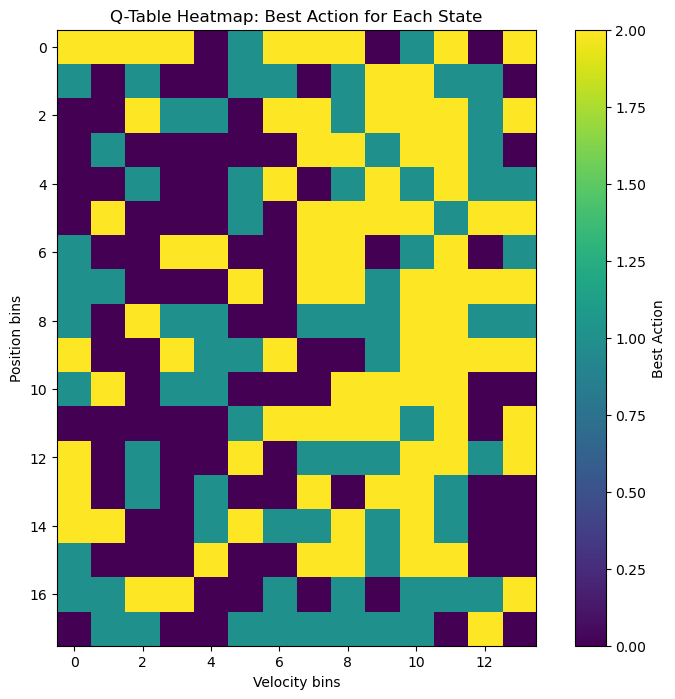

In [ ]:
import matplotlib.pyplot as plt

# Visualize the Q-Table with a Heatmap
# Find the best action for each state
best_action_table = np.argmax(q_table, axis=2)\

plt.figure(figsize=(10, 8))
plt.imshow(best_action_table, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Best Action')
plt.title('Q-Table Heatmap: Best Action for Each State')
plt.xlabel('Velocity bins')
plt.ylabel('Position bins')
plt.show()

### Updating the Q-Table

__Prompt__: Please explain the following code (updating Q-Table) and the rationale behind it in simple words. 

__Prompt:__ For most of the state action pairs the immediate reward is always -1, as we don´t reach the target with the action itself. Can you explain why and how the Q-value for the optimal actions increase over time in the training process? This seems counterintuitive. 

### Testing the trained Agent

__Prompt:__ Based on my code, please provide the code to test the trained agent on some testing episodes with performance measurement. Please change as little as possible and base the new code on the existing code.

In [ ]:
q_table

array([[[ 7.64411761e-01, -4.94063593e-01,  8.51176514e-01],
        [-3.18243871e+01, -3.08813574e+01, -3.15438606e+01],
        [-4.14218380e+01, -4.13949141e+01, -4.09953613e+01],
        [-4.17326268e+01, -4.17355181e+01, -3.85281202e+01],
        [-3.88068306e+01, -3.97176142e+01, -4.14308776e+01],
        [-4.14532357e+01, -4.09624583e+01, -3.81845373e+01],
        [-3.93070334e+01, -3.95512417e+01, -3.75399985e+01],
        [-3.79606364e+01, -3.79046382e+01, -3.61548823e+01],
        [-3.55300221e+01, -3.66884247e+01, -3.39072672e+01],
        [-8.70374844e-01,  3.55584195e-01,  4.36125064e-01],
        [-9.14704478e-01, -7.51382862e-01, -2.99301282e-01],
        [ 9.74286678e-01,  8.07997995e-01, -9.65169247e-01],
        [ 3.99881546e-01, -2.19480915e-01, -3.13947068e-01],
        [-6.49562401e-01, -1.29439625e-01, -5.52008627e-01]],

       [[-2.03483286e+00, -2.46642817e+00, -7.62087035e-01],
        [-3.55804113e+01, -3.55297711e+01, -3.60542471e+01],
        [-4.29429649e+

In [ ]:
num_test_episodes = 10
max_steps = 500

env = gym.make('MountainCar-v0', max_episode_steps = max_steps, render_mode='human')

test_rewards = []
test_success_count = 0

for episode in range(num_test_episodes):
    state, info = env.reset()
    state = discretize_state(state)

    total_reward = 0
    done = False
    truncated = False

    for step in range(max_steps):
        action = np.argmax(q_table[state])

        next_state, reward, done, truncated, info = env.step(action)
        next_state = discretize_state(next_state)

        total_reward += reward
        state = next_state

        env.render()

        if done or truncated:
            break

    test_rewards.append(total_reward)
    if done:
        test_success_count += 1


env.close()

average_test_reward = np.mean(test_rewards)
test_success_rate = (test_success_count / num_test_episodes) * 100
min_test_reward = np.min(test_rewards)
max_test_reward = np.max(test_rewards)

# Print performance metrics for testing phase
print(f'\nTesting Performance Metrics:')
print(f'Average Total Reward: {average_test_reward:.2f}')
print(f'Minimum Reward: {int(min_test_reward)}')
print(f'Maximum Reward: {int(max_test_reward)}')
print(f'Success Rate: {test_success_rate:.2f}% ({test_success_count}/{num_test_episodes})')


Testing Performance Metrics:
Average Total Reward: -157.30
Minimum Reward: -203
Maximum Reward: -147
Success Rate: 100.00% (10/10)


### Excursus: Randomness and Reproducibility of random events ("random seed")

__Problem__: 

- Training of the RL Agent includes several __random events__ 
- -> Trained Agents (q_tables) will be (slightly) __different__ (...even if we use the exact same training parameters). 
- that means, their __performance will differ__ as well.
- when optimizing an Agent by changing the training parameters, (how) can we assess if performance differences are caused by __hyperparameter changes or are just random differences__? 



__Solution:__ Make sure that random events are reproducible (still random but reproducible)  

__Random initial Q-Table__

__Random epsilon-greedy process__ 

__Random Actions__

__Random initial state__ 

### Training and Testing with Reproducibility

In [ ]:
import gymnasium as gym
import numpy as np

# Number of episodes to run
num_episodes = 5000
max_steps = 500
seed = 100

# Create the environment
env = gym.make('MountainCar-v0', max_episode_steps=max_steps)

np.random.seed(seed)
env.action_space.seed(seed)

# Q-learning parameters
alpha = 0.05  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 0.9  # Initial exploration rate
epsilon_decay = 0.995
min_epsilon = 0.01

# Discretize the state space for the Q-table
num_bins = (18, 14)
obs_space = [np.linspace(-1.2, 0.6, num_bins[0]), np.linspace(-0.07, 0.07, num_bins[1])]
q_table = np.random.uniform(low=-1, high=1, size=(num_bins[0], num_bins[1], env.action_space.n))

def discretize_state(state):
    state_idx = []
    for i in range(len(state)):
        state_idx.append(np.digitize(state[i], obs_space[i]) - 1)
    return tuple(state_idx)

# Initialize performance metrics
total_rewards = []
success_count = 0

for episode in range(num_episodes):
    # Reset the environment to get the initial state
    state, info = env.reset(seed = int(np.random.uniform(low = 1, high = 100))) 
    #state, info = env.reset(seed = seed) # always same initial state -> harms learning!!!
    state = discretize_state(state)

    total_reward = 0
    done = False
    truncated = False

    for step in range(max_steps):
        # Epsilon-greedy action selection
        if np.random.random() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state])

        # Take the action and observe the result
        next_state, reward, done, truncated, info = env.step(action)
        next_state = discretize_state(next_state)

        # Update Q-value
        best_next_action = np.argmax(q_table[next_state])
        td_target = reward + gamma * q_table[next_state][best_next_action]
        q_table[state][action] += alpha * (td_target - q_table[state][action])

        # Update the total reward and state
        total_reward += reward
        state = next_state

        if done or truncated:
            break

    # Decay epsilon
    if epsilon > min_epsilon:
        epsilon *= epsilon_decay

    # Record performance metrics
    total_rewards.append(total_reward)

    # Check if the episode is successful based on the 'done' parameter
    if done:
        success_count += 1

    # Print the total reward for every 100th episode and whether it was a success
    if (episode + 1) % 100 == 0:
        print(f'Episode {episode + 1}: Total reward: {int(total_reward)}, Success: {True if done else False}')

# Close the environment
env.close()

# Calculate performance metrics
average_total_reward = np.mean(total_rewards)
success_rate = (success_count / num_episodes) * 100
min_reward = np.min(total_rewards)
max_reward = np.max(total_rewards)

# Print performance metrics
print(f'\nPerformance Metrics:')
print(f'Average Total Reward: {average_total_reward:.2f}')
print(f'Minimum Reward: {int(min_reward)}')
print(f'Maximum Reward: {int(max_reward)}')
print(f'Success Rate: {success_rate:.2f}% ({success_count}/{num_episodes})')

Episode 100: Total reward: -500, Success: False
Episode 200: Total reward: -500, Success: False
Episode 300: Total reward: -500, Success: False
Episode 400: Total reward: -500, Success: False
Episode 500: Total reward: -389, Success: True
Episode 600: Total reward: -272, Success: True
Episode 700: Total reward: -235, Success: True
Episode 800: Total reward: -309, Success: True
Episode 900: Total reward: -500, Success: False
Episode 1000: Total reward: -201, Success: True
Episode 1100: Total reward: -489, Success: True
Episode 1200: Total reward: -243, Success: True
Episode 1300: Total reward: -254, Success: True
Episode 1400: Total reward: -198, Success: True
Episode 1500: Total reward: -156, Success: True
Episode 1600: Total reward: -225, Success: True
Episode 1700: Total reward: -153, Success: True
Episode 1800: Total reward: -233, Success: True
Episode 1900: Total reward: -234, Success: True
Episode 2000: Total reward: -150, Success: True

Performance Metrics:
Average Total Reward: 

### Improving and Optimizing the Agent

__Prompt__: Based on the code and the results, please make some recommendations to improve the performance of the agent. Sort your ideas from highly promising to moderate. What´s your recommendation for hyperparameters? It seems initial epsilon of 0.1 is rather low.  

In [ ]:
# highly promising ideas: 
# tuning hyperparameters, adjusting discretization of state space,
# increasing number of training episodes

In [ ]:
import gymnasium as gym
import numpy as np

# Number of episodes to run
num_episodes = 5000
max_steps = 500
seed = 100

# Create the environment
env = gym.make('MountainCar-v0', max_episode_steps=max_steps)

np.random.seed(seed)
env.action_space.seed(seed)

# Q-learning parameters
alpha = 0.05  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 0.9  # Initial exploration rate
epsilon_decay = 0.995
min_epsilon = 0.01

# Discretize the state space for the Q-table
num_bins = (18, 14)
obs_space = [np.linspace(-1.2, 0.6, num_bins[0]), np.linspace(-0.07, 0.07, num_bins[1])]
q_table = np.random.uniform(low=-1, high=1, size=(num_bins[0], num_bins[1], env.action_space.n))

def discretize_state(state):
    state_idx = []
    for i in range(len(state)):
        state_idx.append(np.digitize(state[i], obs_space[i]) - 1)
    return tuple(state_idx)

# Initialize performance metrics
total_rewards = []
success_count = 0

for episode in range(num_episodes):
    # Reset the environment to get the initial state
    state, info = env.reset(seed = int(np.random.uniform(low = 1, high = 100))) 
    #state, info = env.reset(seed = seed) # always same initial state -> harms learning!!!
    state = discretize_state(state)

    total_reward = 0
    done = False
    truncated = False

    for step in range(max_steps):
        # Epsilon-greedy action selection
        if np.random.random() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state])

        # Take the action and observe the result
        next_state, reward, done, truncated, info = env.step(action)
        next_state = discretize_state(next_state)

        # Update Q-value
        best_next_action = np.argmax(q_table[next_state])
        td_target = reward + gamma * q_table[next_state][best_next_action]
        q_table[state][action] += alpha * (td_target - q_table[state][action])

        # Update the total reward and state
        total_reward += reward
        state = next_state

        if done or truncated:
            break

    # Decay epsilon
    if epsilon > min_epsilon:
        epsilon *= epsilon_decay

    # Record performance metrics
    total_rewards.append(total_reward)

    # Check if the episode is successful based on the 'done' parameter
    if done:
        success_count += 1

    # Print the total reward for every 100th episode and whether it was a success
    if (episode + 1) % 100 == 0:
        print(f'Episode {episode + 1}: Total reward: {int(total_reward)}, Success: {True if done else False}')

# Close the environment
env.close()

# Calculate performance metrics
average_total_reward = np.mean(total_rewards)
success_rate = (success_count / num_episodes) * 100
min_reward = np.min(total_rewards)
max_reward = np.max(total_rewards)

# Print performance metrics
print(f'\nPerformance Metrics:')
print(f'Average Total Reward: {average_total_reward:.2f}')
print(f'Minimum Reward: {int(min_reward)}')
print(f'Maximum Reward: {int(max_reward)}')
print(f'Success Rate: {success_rate:.2f}% ({success_count}/{num_episodes})')

Episode 100: Total reward: -500, Success: False
Episode 200: Total reward: -500, Success: False
Episode 300: Total reward: -500, Success: False
Episode 400: Total reward: -500, Success: False
Episode 500: Total reward: -389, Success: True
Episode 600: Total reward: -272, Success: True
Episode 700: Total reward: -235, Success: True
Episode 800: Total reward: -309, Success: True
Episode 900: Total reward: -500, Success: False
Episode 1000: Total reward: -201, Success: True
Episode 1100: Total reward: -489, Success: True
Episode 1200: Total reward: -243, Success: True
Episode 1300: Total reward: -254, Success: True
Episode 1400: Total reward: -198, Success: True
Episode 1500: Total reward: -156, Success: True
Episode 1600: Total reward: -225, Success: True
Episode 1700: Total reward: -153, Success: True
Episode 1800: Total reward: -233, Success: True
Episode 1900: Total reward: -234, Success: True
Episode 2000: Total reward: -150, Success: True
Episode 2100: Total reward: -152, Success: T

In [ ]:
# Number of testing episodes to run
num_test_episodes = 2000
max_steps = 500

# Create the environment
env = gym.make('MountainCar-v0', max_episode_steps=max_steps)

In [ ]:
# Testing phase
test_rewards = []
test_success_count = 0
seed = 100
np.random.seed(seed)

for episode in range(num_test_episodes):
    # Reset the environment to get the initial state
    #state, info = env.reset()
    state, info = env.reset(seed = int(np.random.uniform(low = 1, high = 100)))
    state = discretize_state(state)

    total_reward = 0
    done = False
    truncated = False

    for step in range(max_steps):
        # Use the learned policy (no exploration)
        action = np.argmax(q_table[state])

        # Take the action and observe the result
        next_state, reward, done, truncated, info = env.step(action)
        next_state = discretize_state(next_state)

        # Update the total reward and state
        total_reward += reward
        state = next_state

        if done or truncated:
            break

    # Record performance metrics
    test_rewards.append(total_reward)

    # Check if the episode is successful based on the 'done' parameter
    if done:
        test_success_count += 1

    # Print the total reward for every 10th episode and whether it was a success
    if (episode + 1) % 1000 == 0:
        print(f'Test Episode {episode + 1}: Total reward: {int(total_reward)}, Success: {True if done else False}')

# Close the environment
env.close()

# Calculate performance metrics for testing phase
average_test_reward = np.mean(test_rewards)
test_success_rate = (test_success_count / num_test_episodes) * 100
min_test_reward = np.min(test_rewards)
max_test_reward = np.max(test_rewards)

# Print performance metrics for testing phase
print(f'\nTesting Performance Metrics:')
print(f'Average Total Reward: {average_test_reward:.2f}')
print(f'Minimum Reward: {int(min_test_reward)}')
print(f'Maximum Reward: {int(max_test_reward)}')
print(f'Success Rate: {test_success_rate:.2f}% ({test_success_count}/{num_test_episodes})')

Test Episode 1000: Total reward: -146, Success: True
Test Episode 2000: Total reward: -148, Success: True

Testing Performance Metrics:
Average Total Reward: -149.46
Minimum Reward: -156
Maximum Reward: -141
Success Rate: 100.00% (2000/2000)


## Visualizing the Training Process/Rewards over Episodes

__Prompt__: The performance of the RL Agent does not steadily increase with more training episodes. Please analyze and interpret the following chart with total rewards over episodes. Point out how to overcome the issue of stagnating/worsening performance when increasing the number of training episodes beyond a certain point.    

In [ ]:
total_rewards

[-500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -485.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 -500.0,
 

<function matplotlib.pyplot.show(close=None, block=None)>

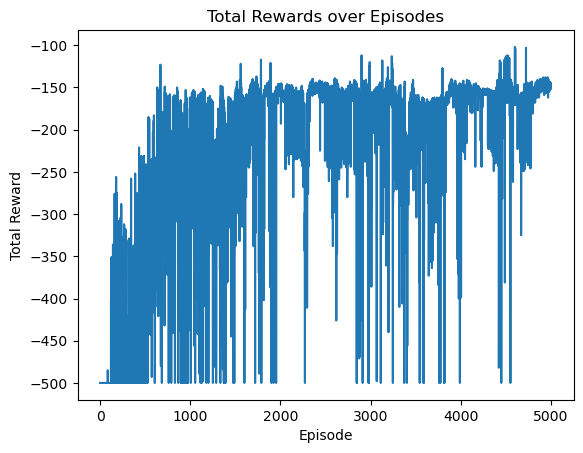

In [ ]:
import matplotlib.pyplot as plt
plt.plot(total_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Rewards over Episodes')
plt.show

### State Space Discretization (increase granularity)

__Pro__: Increasing the number of bins can provide a more detailed representation of the state space, potentially leading to more precise Q-values. 

__Con__: However, this will also increase the size of the Q-table, so there is a trade-off in terms of computational resources.

__Rule of Thumb__: Increasing the number of State-Action pairs by the factor x [4] requires in increase of Training Episodes by the factor x [4]. 

### Final Review, Conclusion and Outlook

__Prompt__: 

This is my code to train a Reinforcement Agent for the Mountain Car challenge: ---insert code---

The Performance is as follows: ---insert performance printout

Please analyze, interpret and critically assess.


__Prompt__: Please make suggestions to further improve the performance, sorted from highly promising to moderate.